In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds


# Step 1: Load MovieLens 100k data from file or URL
url = 'https://files.grouplens.org/datasets/movielens/ml-100k/u.data'
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(url, sep='\t', names=column_names)

# Create a pivot table (user-item matrix) for ratings
ratings_matrix = df.pivot(index='user_id', columns='item_id', values='rating')
 

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds
 
# Step 3: Identify non-NA entries in the ratings matrix
non_na_mask = ratings_matrix.notna()

# Convert mask to a list of non-NA (user, item) pairs
non_na_indices = np.argwhere(non_na_mask.values)  # Get (row, col) indices of non-NA values

# Randomly select 20% of non-NA entries to introduce missing data
n_remove = int(0.2 * len(non_na_indices))  # 20% of available data
remove_indices = np.random.choice(np.arange(len(non_na_indices)), size=n_remove, replace=False)

# Save the original values that will be removed for later evaluation
original_values = ratings_matrix.copy()

# Step 4: Introduce missing values
ratings_matrix_masked = ratings_matrix.copy()

# Set the selected 20% of data points to NaN
for index in remove_indices:
    row, col = non_na_indices[index]  # Get the (row, col) pair
    ratings_matrix_masked.iloc[row, col] = np.nan  # Set the value at that position to NaN

# Step 5: Fill the missing values with 0 for SVD input (other methods can be used here)
R_filled = ratings_matrix_masked.fillna(0).values

# Step 6: Apply SVD (Singular Value Decomposition)
# Decompose the matrix using SVD
U, sigma, Vt = svds(R_filled, k=50)  # Using 50 latent factors
sigma = np.diag(sigma)  # Convert sigma (1D array) to a diagonal matrix

# Reconstruct the matrix using the decomposed matrices
R_predicted = np.dot(np.dot(U, sigma), Vt)

# Step 7: Evaluate performance of the SVD model
# Create a DataFrame for the predicted ratings
imputed_ratings = pd.DataFrame(R_predicted, columns=ratings_matrix.columns, index=ratings_matrix.index)

# Calculate RMSE on the originally removed 20% of the data
true_values = original_values.iloc[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]
predicted_values = imputed_ratings.iloc[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]



In [3]:
# Extract the values from the original matrix and imputed matrix for comparison
true_values = original_values.values[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]
predicted_values = imputed_ratings.values[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]

# Check if their shapes match
print(f"True values shape: {true_values.shape}")
print(f"Predicted values shape: {predicted_values.shape}")

# Calculate RMSE if shapes match
if true_values.shape == predicted_values.shape:
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    print(f'RMSE for the SVD-based prediction: {rmse}')
else:
    print("Error: Shape mismatch between true values and predicted values.")


True values shape: (20000,)
Predicted values shape: (20000,)
RMSE for the SVD-based prediction: 2.876127812726225


In [ ]:
ratings_matrix_masked 

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,4.0,3.0,NaN,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import numpy as np
from fancyimpute import IterativeSVD
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [6]:
mycebmf= cEBMF(data= np.array(ratings_matrix_masked), K=12,
               prior_L = "exp",
               prior_F = "exp")

In [7]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])
print(mycebmf.K)

The array contains missing values (NaN), generate initialization using iterive svd.
[IterativeSVD] Iter 1: observed MAE=2.678435
[IterativeSVD] Iter 2: observed MAE=2.141019
[IterativeSVD] Iter 3: observed MAE=1.730078
[IterativeSVD] Iter 4: observed MAE=1.413970
[IterativeSVD] Iter 5: observed MAE=1.216818
[IterativeSVD] Iter 6: observed MAE=1.097134
[IterativeSVD] Iter 7: observed MAE=1.016187
[IterativeSVD] Iter 8: observed MAE=0.957595
[IterativeSVD] Iter 9: observed MAE=0.913183
[IterativeSVD] Iter 10: observed MAE=0.878426
[IterativeSVD] Iter 11: observed MAE=0.850332
[IterativeSVD] Iter 12: observed MAE=0.827155
[IterativeSVD] Iter 13: observed MAE=0.807707
[IterativeSVD] Iter 14: observed MAE=0.791123
[IterativeSVD] Iter 15: observed MAE=0.776815
[IterativeSVD] Iter 16: observed MAE=0.764296
[IterativeSVD] Iter 17: observed MAE=0.753235
[IterativeSVD] Iter 18: observed MAE=0.743368
[IterativeSVD] Iter 19: observed MAE=0.734511
[IterativeSVD] Iter 20: observed MAE=0.726509
[Iter

In [8]:
for i in range(60):
    mycebmf.iter()

[0.11597474 0.06788224 0.06326725 0.05842992 0.05363147 0.04911801
 0.04507387 0.04160101 0.03872453 0.03641309 0.03460219 0.03321325
 0.03216667 0.0313895  0.03081919 0.03040458 0.03010536 0.02989059
 0.02973707 0.02962767 0.02954988 0.02949466 0.0294555  0.02942775]
[0.11597474 0.06788224 0.06326725 0.05842992 0.05363147 0.04911801
 0.04507387 0.04160101 0.03872453 0.03641309 0.03460219 0.03321325
 0.03216667 0.0313895  0.03081919 0.03040458 0.03010536 0.02989059
 0.02973707 0.02962767 0.02954988 0.02949466 0.0294555  0.02942775]
[0.11597474 0.06788224 0.06326725 0.05842992 0.05363147 0.04911801
 0.04507387 0.04160101 0.03872453 0.03641309 0.03460219 0.03321325
 0.03216667 0.0313895  0.03081919 0.03040458 0.03010536 0.02989059
 0.02973707 0.02962767 0.02954988 0.02949466 0.0294555  0.02942775]
[0.11597474 0.06788224 0.06326725 0.05842992 0.05363147 0.04911801
 0.04507387 0.04160101 0.03872453 0.03641309 0.03460219 0.03321325
 0.03216667 0.0313895  0.03081919 0.03040458 0.03010536 0.0

c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\posterior_computation.py:83: RuntimeWarning: overflow encountered in exp
  wpost = w* np.exp( log_prob) / (sum(w *np.exp(log_prob)))
c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\posterior_computation.py:83: RuntimeWarning: invalid value encountered in divide
  wpost = w* np.exp( log_prob) / (sum(w *np.exp(log_prob)))
c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ash.py:55: RuntimeWarning: divide by zero encountered in log
  log_lik =    np.sum(np.log(np.sum(np.exp(L)*optimal_pi, axis=1)))


ValueError: cannot convert float NaN to integer

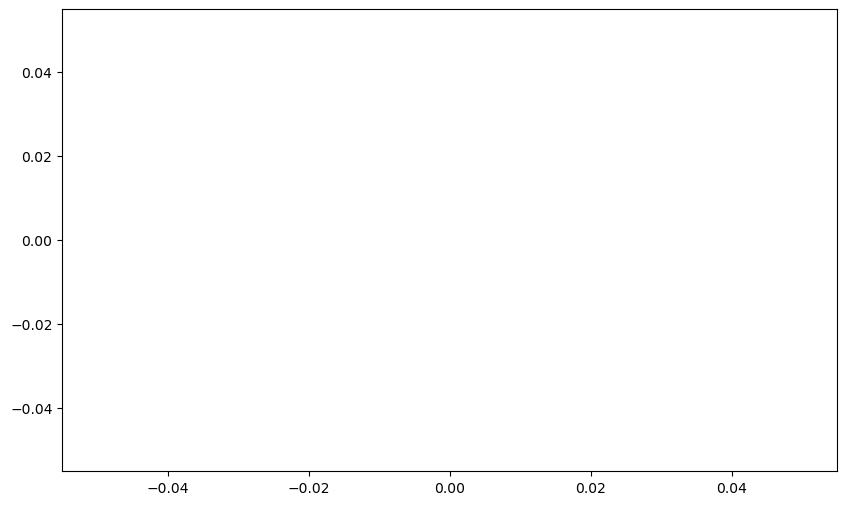

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

In [10]:
# Assuming 'Y' is the numpy array with your imputed data
# Also assuming 'original_values' is the original DataFrame before you removed 20% of the data
Y= mycebmf.Y_fit
# Extract the original values that were removed (same as before)
true_values = original_values.values[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]

# Extract the corresponding imputed values from Y
imputed_values = Y[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]

# Check if their shapes match
print(f"True values shape: {true_values.shape}")
print(f"Imputed values shape: {imputed_values.shape}")

# Calculate RMSE if shapes match
if true_values.shape == imputed_values.shape:
    rmse = np.sqrt(mean_squared_error(true_values, imputed_values))
    print(f'RMSE for your custom imputation method: {rmse}')
else:
    print("Error: Shape mismatch between true values and imputed values.")


True values shape: (20000,)
Imputed values shape: (20000,)
RMSE for your custom imputation method: 1.0406477314600648


In [13]:
k=1
mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
     
ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     = mycebmf.prior_L,
                      verbose=False
                      )
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2

c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ash.py:46: RuntimeWarning: overflow encountered in exp
  optimal_pi = optimize_pi( np.exp(L),
c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:237: RuntimeWarning: invalid value encountered in divide
  w = w / w.sum(axis=0, keepdims=True)  # Normalize by sum over k for each j


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan n

c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:42: RuntimeWarning: overflow encountered in exp
  scaled_res = -np.exp(dnorm_diff - pnorm_diff)
c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:85: RuntimeWarning: overflow encountered in exp
  alpha_frac = alpha * np.exp(stats.norm.logpdf(alpha) - pnorm_diff)
c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:86: RuntimeWarning: overflow encountered in exp
  beta_frac = beta * np.exp(stats.norm.logpdf(beta) - pnorm_diff)
c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ash.py:55: RuntimeWarning: overflow encountered in exp
  log_lik =    np.sum(np.log(np.sum(np.exp(L)*optimal_pi, axis=1)))
